In [1]:
#Kittipong Wangnok
#School of Physics, Institute of Science, Suranaree University of Technology
#Import module
import sys
import os
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
from matplotlib import pyplot as plt

from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif',size=14)

In [2]:
T0_bjd = 48773.215071
T0_bjd_err = 0.000018
P0_day = 0.06236283691
P0_day_err = 0.00000000070

In [3]:
T0 = T0_bjd
P_orb = P0_day
P_dot = -4.4e-12

### Generate data

In [4]:
N = 700
x_range = [i for i in range(N)]
x_range_a = [i for i in range(N)]
y_range = [i for i in range(len(x_range))]
step=1*100
#step

interporate = []
for i in range(300, N):
    x_range[i] = i*step
    x_range_a[i] = x_range
    Epoch = np.round((x_range[i] - T0_bjd)/P0_day)
    y_range[i] = T0 + P_orb*Epoch + (1/2)*P_orb*P_dot*Epoch*Epoch
#    print(x_range[i], y_range[i], Epoch)
    interporate.append('%0.0f %0.10f %0.10f %0.0f %0.5f %0.5f' %(i, T0, P_orb, Epoch, x_range[i], y_range[i]))
    
data_out = interporate
f = open("interporate_generated_data.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

In [5]:
#Please change the input file
DP_Leo_bjd = open("interporate_generated_data.out",'r').readlines()
N_dpleo_bjd = len(DP_Leo_bjd)

#Read datat
Cycle = []
T_obs = []
#Please change the input file
for line in open("interporate_generated_data.out"):
#for line in open("T_mid_Beuermann_Schwope.in"):
    li=line.strip()
    if not li.startswith("#"):
        Cycle.append(float(li.split(" ")[3]))
        T_obs.append(float(li.split(" ")[5]))

In [6]:
BJD_time_a = [i for i in range(N_dpleo_bjd)]
Delta_aT = [i for i in range(N_dpleo_bjd)]
Delta_aT_err = [i for i in range(N_dpleo_bjd)]
E_af = [i for i in range(N_dpleo_bjd)] #float number
E_ak = [i for i in range(N_dpleo_bjd)] #integer number
E_aj = [i for i in range(N_dpleo_bjd)] #integer number
P_aE = [i for i in range(N_dpleo_bjd)]
P_err_aE = [i for i in range(N_dpleo_bjd)]
T_aC_linear = [i for i in range(N_dpleo_bjd)]
T_aO_linear = [i for i in range(N_dpleo_bjd)]
P_aver_a = [i for i in range(N_dpleo_bjd)]
P_aver_std_a = [i for i in range(N_dpleo_bjd)]

In [7]:
OC_cal = []
#print ('-----------------------------------------------------------------------------')
#print ('Cycle \t\t T_O \t   T_C \t\t BJD - 2450000 \t OC_lin OC_err_Lin OC_occ')
print('No. \t BJD_time \t Cycle \t T_O_linear \t T_C_linear \t OC_s \t\t OC_s_err')
#print ('-----------------------------------------------------------------------------')
for i in range (0,N_dpleo_bjd):
    BJD_time = np.array(T_obs)
    BJD_time_a[i] = BJD_time
    Delta_T = np.array(T_obs) - np.array(T0_bjd)
    Delta_aT[i] = Delta_T #arrays
    E_k = Cycle
    E_ak[i] = E_k #arrays
    #    print (Delta_T_err[i])
    E_f = Delta_T / P0_day                      #Calculate cycle with float number
    ##    print (E_f)                                 #print cycle with float number
    E_af[i] = E_f #arrays
    E_j = np.round(Delta_T / P0_day)           #Calculate cycle with integer number
##print (Delta_T)
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        T_O_linear = T0_bjd + P_aE[i]*E_j[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
    else:
        E_k[i] = 1
        P_E_day = Delta_T[i] / E_k[i]
#        print (P_E_day)
        P_aE[i] = P_E_day
        T_O_linear = T0_bjd + P_aE[i]*E_k[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
#    print ('%0.6f' %(T_O))
#print (E_j)                                #print cycle with integer number
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
    else:
        P_E_day = Delta_T[i] / E_k[i]
        P_aE[i] = P_E_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
    print ('%0.0f\t%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f' %(i, BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s))
    OC_cal.append('%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f' %(BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s))
    
rerults = OC_cal
f = open('oc_linear_Schwope2002_generated_model.txt', 'w')
#for upper_result in upper_result:
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No. 	 BJD_time 	 Cycle 	 T_O_linear 	 T_C_linear 	 OC_s 		 OC_s_err
0	29999.993120	-301032	29999.993120	30000.005550	-1073.978687
1	30099.960880	-299429	30099.960880	30099.973178	-1062.536453
2	30199.991000	-297825	30199.991000	30200.003168	-1051.339327
3	30299.958760	-296222	30299.958760	30299.970796	-1039.897093
4	30399.988880	-294618	30399.988880	30400.000786	-1028.699967
5	30500.019000	-293014	30500.019000	30500.030777	-1017.502842
6	30599.986750	-291411	30599.986750	30599.998404	-1006.924607
7	30700.016870	-289807	30700.016870	30700.028395	-995.727482
8	30799.984630	-288204	30799.984630	30799.996022	-984.285247
9	30900.014740	-286600	30900.014740	30900.026013	-973.952122
10	30999.982500	-284997	30999.982500	30999.993640	-962.509887
11	31100.012610	-283393	31100.012610	31100.023631	-952.176761
12	31199.980360	-281790	31199.980360	31199.991258	-941.598527
13	31300.010480	-280186	31300.010480	31300.021249	-930.401401
14	31399.978230	-278583	31399.978230	31399.988876	-919.823167
15	31

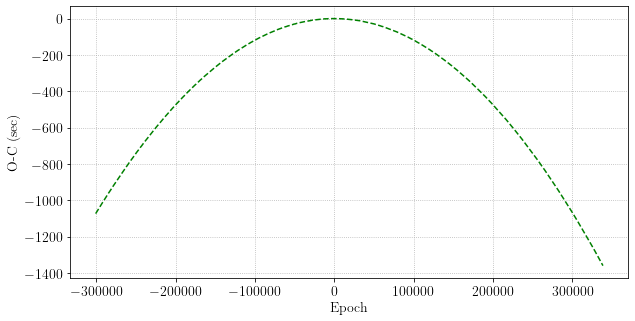

In [8]:
#Plot O-C vs BJD
InputFileInput  = "oc_linear_Schwope2002_generated_model.txt"
Data   = np.genfromtxt(InputFileInput)
generated_BJD_time = Data[:,0]
generated_Cycle = Data[:,1]
generated_T_O = Data[:,2]
generated_T_C = Data[:,3]
generated_OC_s = Data[:,4]

##Plotgraph
fig=plt.figure(figsize=(10, 5))
plt.plot(generated_Cycle, generated_OC_s, '--', markersize=8, color='green')
#plt.xlim(4850,5450)
#plt.ylim(-50,60)
#plt.xlabel('BJD - 2400000')
plt.xlabel('Epoch')
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.show()

### Perform the O-C diagram from Schwope data

In [9]:
#Please change the input file
DP_Leo_bjd = open("oc_dpleo_Schwope_2002.inp",'r').readlines()
N_dpleo_bjd = len(DP_Leo_bjd)

#Read datat
Cycle = []
T_obs = []
T_obs_err = []
#Please change the input file
for line in open("oc_dpleo_Schwope_2002.inp"):
#for line in open("T_mid_Beuermann_Schwope.in"):
    li=line.strip()
    if not li.startswith("#"):
        Cycle.append(float(li.split(" ")[0]))
        T_obs.append(float(li.split(" ")[1]))
        T_obs_err.append(float(li.split(" ")[2]))

In [10]:
BJD_time_a = [i for i in range(N_dpleo_bjd)]
Delta_aT = [i for i in range(N_dpleo_bjd)]
Delta_aT_err = [i for i in range(N_dpleo_bjd)]
E_af = [i for i in range(N_dpleo_bjd)] #float number
E_ak = [i for i in range(N_dpleo_bjd)] #integer number
E_aj = [i for i in range(N_dpleo_bjd)] #integer number
P_aE = [i for i in range(N_dpleo_bjd)]
P_err_aE = [i for i in range(N_dpleo_bjd)]
T_aC_linear = [i for i in range(N_dpleo_bjd)]
T_aO_linear = [i for i in range(N_dpleo_bjd)]
P_aver_a = [i for i in range(N_dpleo_bjd)]
P_aver_std_a = [i for i in range(N_dpleo_bjd)]

In [11]:
OC_cal = []
#print ('-----------------------------------------------------------------------------')
#print ('Cycle \t\t T_O \t   T_C \t\t BJD - 2450000 \t OC_lin OC_err_Lin OC_occ')
print('No. \t BJD_time \t Cycle \t T_O_linear \t T_C_linear \t OC_s \t\t OC_s_err')
#print ('-----------------------------------------------------------------------------')
for i in range (0,N_dpleo_bjd):
    BJD_time = np.array(T_obs)
    BJD_time_a[i] = BJD_time
    Delta_T = np.array(T_obs) - np.array(T0_bjd)
    Delta_aT[i] = Delta_T #arrays
    Delta_T_err = np.sqrt((np.array(T_obs_err)/np.array(T_obs))**2 + (np.array(T0_bjd_err)/np.array(T0_bjd))**2)
    E_k = Cycle
    E_ak[i] = E_k #arrays
    #    print (Delta_T_err[i])
    E_f = Delta_T / P0_day                      #Calculate cycle with float number
    ##    print (E_f)                                 #print cycle with float number
    E_af[i] = E_f #arrays
    E_j = np.round(Delta_T / P0_day)           #Calculate cycle with integer number
##print (Delta_T)
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_j[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
    else:
        E_k[i] = 1
        P_E_day = Delta_T[i] / E_k[i]
#        print (P_E_day)
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_k[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
#    print ('%0.6f' %(T_O))
#print (E_j)                                #print cycle with integer number
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
#        print (P_E_err_day)
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2 + (np.array(P0_day_err)**2))) * np.array(E_j[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    else:
        P_E_day = Delta_T[i] / E_k[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2)) *np.array(E_k[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    print ('%0.0f\t%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(i, BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))
    OC_cal.append('%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))
    
rerults = OC_cal
f = open('oc_linear_dpleo_Beuermann_Schwope_Kittipong_ephemeris_determination.txt', 'w')
#for upper_result in upper_result:
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No. 	 BJD_time 	 Cycle 	 T_O_linear 	 T_C_linear 	 OC_s 		 OC_s_err
0	44214.553250	-73099	44214.553250	44214.554056	-69.613855	14.152934
1	44214.615620	-73098	44214.615620	44214.616419	-68.994964	14.152915
2	44214.677980	-73097	44214.677980	44214.678781	-69.240073	14.152897
3	44968.023090	-61017	44968.023090	44968.021851	107.026918	98.514167
4	44968.957120	-61002	44968.957120	44968.957294	-15.017718	98.514133
5	44969.019620	-61001	44969.019620	44969.019657	-3.166827	98.514131
6	44978.997550	-60841	44978.997550	44978.997711	-13.872271	98.513769
7	44993.900780	-60602	44993.900780	44993.902429	-142.437327	58.559231
8	44993.963280	-60601	44993.963280	44993.964791	-130.586436	58.559227
9	44994.026420	-60600	44994.026420	44994.027154	-63.439545	58.559223
10	45020.905130	-60169	45020.905130	45020.905537	-35.161535	18.800223
11	45021.902920	-60153	45021.902920	45021.903342	-36.491280	18.800036
12	45024.833860	-60106	45024.833860	45024.834396	-46.283404	58.557361
13	45731.966400	-48767	45731.96

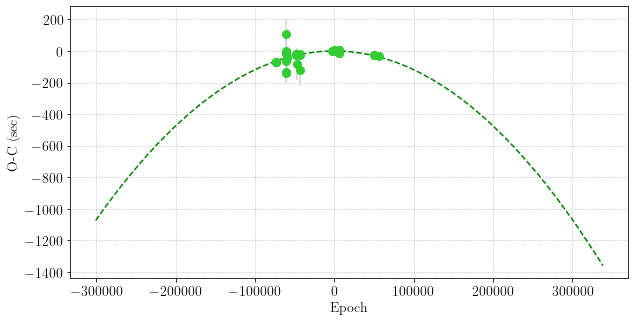

In [12]:
#Plot O-C vs BJD
InputFileInput  = 'oc_linear_dpleo_Beuermann_Schwope_Kittipong_ephemeris_determination.txt'
Data   = np.genfromtxt(InputFileInput)
BJD_time = Data[:,0]
Cycle = Data[:,1]
T_O = Data[:,2]
T_C = Data[:,3]
OC_s = Data[:,4]
OC_s_err = Data[:,5]

##Plotgraph
fig=plt.figure(figsize=(10, 5))
plt.errorbar(Cycle, OC_s, yerr=OC_s_err, fmt='o', markersize=8, color='limegreen', ecolor='lightgray')
plt.plot(generated_Cycle, generated_OC_s, '--', markersize=8, color='green')
#plt.xlim(4850,5450)
#plt.ylim(-50,60)
#plt.xlabel('BJD - 2400000')
plt.xlabel('Epoch')
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.savefig("Schwope2002_generated_model.pdf", dpi=1200)
plt.show()